In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titanic_data = pd.read_csv("/content/train.csv")

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


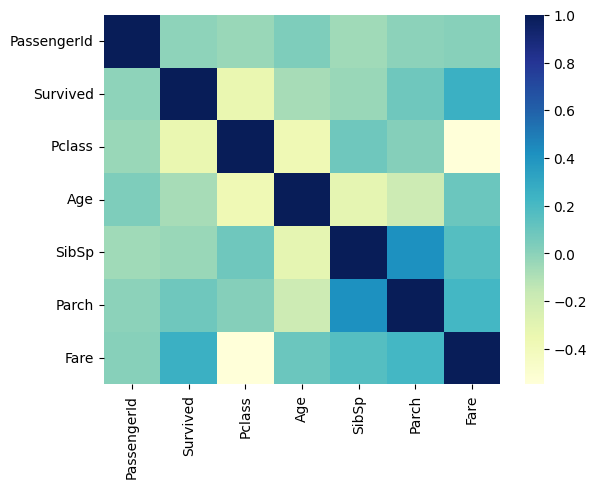

In [ ]:
import seaborn as sns
sns.heatmap(titanic_data.corr(numeric_only=True), cmap="YlGnBu")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data,titanic_data[["Survived","Pclass","Sex"]]):
  strat_train_set = titanic_data.loc[train_indices]
  start_test_set = titanic_data.loc[test_indices]

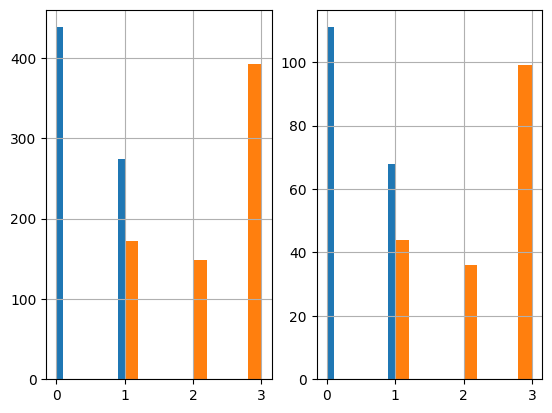

In [ ]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
plt.subplot(1,2,2)
start_test_set['Survived'].hist()
start_test_set['Pclass'].hist()
plt.show()

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 452 to 160
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          571 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [ ]:
class AgeImputer(BaseEstimator, TransformerMixin):
  def fit(self,x,y=None):
    return self
  def transform(self,x):
    imputer = SimpleImputer(strategy="mean")
    x['Age'] = imputer.fit_transform(x[['Age']])
    return x

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
class featureEncoder(BaseEstimator, TransformerMixin):
  def fit(self,x,y=None):
    return self

  def transform(self,x):
    encoder = OneHotEncoder()
    matrix = encoder.fit_transform(x[['Embarked']]).toarray()
    column_names = ["C","Q","S","N"]
    for i in range(len(matrix.T)):
      x[column_names[i]] = matrix.T[i]
    matrix = encoder.fit_transform(x[['Sex']]).toarray()
    column_names = ["Female","Male"]
    for i in range(len(matrix.T)):
      x[column_names[i]] = matrix.T[i]
    return x

In [ ]:
class FeatureDropper(BaseEstimator, TransformerMixin):
  def fit(self, x, y=None):
    return self
  def transform(self,x):
    return x.drop(["Embarked","Name","Ticket","Cabin","Sex","N"], axis=1, errors="ignore")

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ("ageimputer", AgeImputer()),
    ("featureencoder", featureEncoder()),
    ("featuredropper", FeatureDropper())
])

strat_train_set = pipeline.fit_transform(strat_train_set)

In [ ]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Female,Male
452,453,0,1,30.000000,0,0,27.7500,1.0,0.0,0.0,0.0,1.0
436,437,0,3,21.000000,2,2,34.3750,0.0,0.0,1.0,1.0,0.0
793,794,0,1,29.999422,0,0,30.6958,1.0,0.0,0.0,0.0,1.0
8,9,1,3,27.000000,0,2,11.1333,0.0,0.0,1.0,1.0,0.0
883,884,0,2,28.000000,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
184,185,1,3,4.000000,0,2,22.0250,0.0,0.0,1.0,1.0,0.0
752,753,0,3,33.000000,0,0,9.5000,0.0,0.0,1.0,0.0,1.0
840,841,0,3,20.000000,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
464,465,0,3,29.999422,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 452 to 160
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   Q            712 non-null    float64
 9   S            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
x = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']
Scaler = StandardScaler()
x_data = Scaler.fit_transform(x)
y_data = y.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
Param_grid = [
    {"n_estimators":[10,100,200,500], "max_depth":[None, 5, 10], "min_samples_split":[2, 3, 4]}
]
grid_search = GridSearchCV(clf, Param_grid, cv = 3, scoring="accuracy",return_train_score=True)
grid_search.fit(x_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf = grid_search.best_estimator_

In [ ]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=10)

In [ ]:
start_test_set = pipeline.fit_transform(start_test_set)

In [ ]:
start_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Female,Male
427,428,1,2,19.0,0,0,26.0000,0.0,0.0,1.0,1.0,0.0
382,383,0,3,32.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
570,571,1,2,62.0,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
853,854,1,1,16.0,0,1,39.4000,0.0,0.0,1.0,1.0,0.0
615,616,1,2,24.0,1,2,65.0000,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
525,526,0,3,40.5,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
788,789,1,3,1.0,1,2,20.5750,0.0,0.0,1.0,0.0,1.0
688,689,0,3,18.0,0,0,7.7958,0.0,0.0,1.0,0.0,1.0


In [ ]:
x_test = start_test_set.drop(['Survived'], axis=1)
y_test = start_test_set['Survived']
Scaler = StandardScaler()
x_data_set = Scaler.fit_transform(x_test)
y_data_set = y_test.to_numpy()

In [ ]:
final_clf.score(x_data_set, y_data_set)

0.7821229050279329

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
final_data = pipeline.fit_transform(titanic_data)

In [ ]:
x_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']
Scaler = StandardScaler()
x_data_final = Scaler.fit_transform(x_final)
y_data_final = y_final.to_numpy()

In [ ]:
prod_clf = RandomForestClassifier()
param_grid = [
    {"n_estimators":[10,100,200,500], "max_depth":[None, 5, 10], "min_samples_split":[2, 3, 4]}
]
grid_search = GridSearchCV(prod_clf, param_grid, cv = 3, scoring="accuracy",return_train_score=True)
grid_search.fit(x_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
prod_final_clf = grid_search.best_estimator_

In [ ]:
prod_final_clf

RandomForestClassifier(max_depth=10)

In [ ]:
titanic_test_data = pd.read_csv("/content/test.csv")

In [ ]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [ ]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   Q            418 non-null    float64
 8   S            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [ ]:
x_final_test = final_test_data
x_final_test = x_final_test.fillna(method="FFill")
Scaler = StandardScaler()
x_data_final_test = Scaler.fit_transform(x_final_test)

In [ ]:
predictions = prod_final_clf.predict(x_data_final_test)

In [ ]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])

In [ ]:
final_df['Survived'] = predictions

In [ ]:
final_df.to_csv("/content/predictions.csv", index = False)

In [ ]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
